In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
def find_config_files(root):
    config_files = []
    for dirpath, _, filenames in os.walk(root):
        for filename in filenames:
            if filename.endswith(".py"):
                config_files.append(os.path.join(dirpath, filename))
    return config_files


In [9]:
config_files = find_config_files('configs')

In [10]:
strip_config_name = lambda x: os.path.basename(x).replace('.py', '')

#Performances on one dataset by different models
dataset_models_files = dict(
    ENZYMES={},
    MUTAG={},
    PROTEINS={},
)

# Performances of one model across multiple datasets
models_dataset_files = dict(
    GCN={},
    GIN={},
    GAT={},
    GRAPHSAGE={},
)

for config_file in config_files:
    config_name = strip_config_name(config_file)
    dataset = config_name.split('_')[0].upper()
    model = config_name.split('_')[1].upper()

    if dataset in dataset_models_files:
        dataset_models_files[dataset][model] = config_name
    if model in models_dataset_files:
        models_dataset_files[model][dataset] = config_name



In [11]:
dataset_models_perf = dict(
    ENZYMES={},
    MUTAG={},
    PROTEINS={},
)

models_dataset_perf = dict(
    GCN={},
    GIN={},
    GAT={},
    GRAPHSAGE={},
)

In [ ]:
def extract_acc_per_directory(directory):
    """ Extracts the maximum validation accuracy from CSV files in a given directory.
    Args:
        directory (str): The path to the directory containing the CSV files.
    Returns:
        list: A list of maximum validation accuracies found in the CSV files.
    """
    accs = []
    for file in os.listdir(directory):
        if file.startswith('history_fold_') and file.endswith('.csv'):
            df = pd.read_csv(os.path.join(directory, file))
            if 'val_acc' in df.columns:
                accs.append(df['val_acc'].max())
    return accs

In [13]:
# find every folder in work_dirs and open get latest subfolder

def find_latest_subfolder(root):
    latest_subfolder = None
    latest_time = 0

    for dirpath, dirnames, _ in os.walk(root):
        for dirname in dirnames:
            subfolder_path = os.path.join(dirpath, dirname)
            folder_time = os.path.getmtime(subfolder_path)
            if folder_time > latest_time:
                latest_time = folder_time
                latest_subfolder = subfolder_path

    return latest_subfolder


In [14]:
root_dir = 'work_dirs'
def extract_performances():
    for dataset, models in dataset_models_files.items():
        for model, config_name in models.items():
            dir = os.path.join(root_dir, config_name)
            latest_dir = find_latest_subfolder(dir)
            accs = extract_acc_per_directory(latest_dir)
            dataset_models_perf[dataset][model] = accs

    for model, datasets in models_dataset_files.items():
        for dataset, config_name in datasets.items():
            dir = os.path.join(root_dir, config_name)
            latest_dir = find_latest_subfolder(dir)
            accs = extract_acc_per_directory(latest_dir)
            models_dataset_perf[model][dataset] = accs

In [15]:
extract_performances()

In [16]:
models_dataset_perf

{'GCN': {'ENZYMES': [np.float64(0.5666666666666667),
   np.float64(0.5666666666666667),
   np.float64(0.7166666666666667),
   np.float64(0.8166666666666667),
   np.float64(0.6333333333333333),
   np.float64(0.5333333333333333),
   np.float64(0.5666666666666667),
   np.float64(0.6333333333333333),
   np.float64(0.6166666666666667),
   np.float64(0.6166666666666667)],
  'MUTAG': [np.float64(0.8947368421052632),
   np.float64(0.7894736842105263),
   np.float64(0.7894736842105263),
   np.float64(0.7894736842105263),
   np.float64(0.7894736842105263),
   np.float64(0.7894736842105263),
   np.float64(0.8421052631578947),
   np.float64(0.8421052631578947),
   np.float64(0.7777777777777778),
   np.float64(0.8888888888888888)],
  'PROTEINS': []},
 'GIN': {'ENZYMES': [np.float64(0.4),
   np.float64(0.3833333333333333),
   np.float64(0.35),
   np.float64(0.5166666666666667),
   np.float64(0.35),
   np.float64(0.45),
   np.float64(0.4666666666666667),
   np.float64(0.4333333333333333),
   np.float

In [ ]:
def plot_dataset_performances(dataset_models_perf, dataset):
    if dataset not in dataset_models_perf:
        print(f"Dataset {dataset} not found.")
        return

    data = dataset_models_perf[dataset]
    models = list(data.keys())
    scores = [data[model] for model in models] 

    plt.style.use('classic')  
    fig, ax = plt.subplots(figsize=(10, 6))

    bp = ax.boxplot(
        scores,
        labels=models,
        notch=False,
        patch_artist=True,  
        showmeans=True,
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5),
        medianprops=dict(color='black', linewidth=1.5),
        meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'),
        flierprops=dict(marker='.', color='black', alpha=0.4)
    )

    ax.set_xlabel('Models')
    ax.set_ylabel('Validation Accuracy')
    ax.set_title(f'Model Performances on {dataset} Dataset')
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig(f'boxplot_{dataset}.png', dpi=400, bbox_inches='tight')
    plt.show()

C:\Users\erikd\AppData\Local\Temp\ipykernel_2948\455709137.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


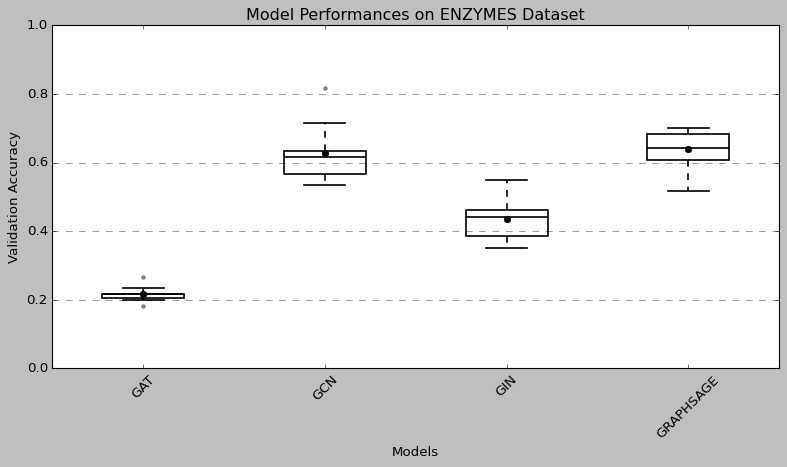

C:\Users\erikd\AppData\Local\Temp\ipykernel_2948\455709137.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


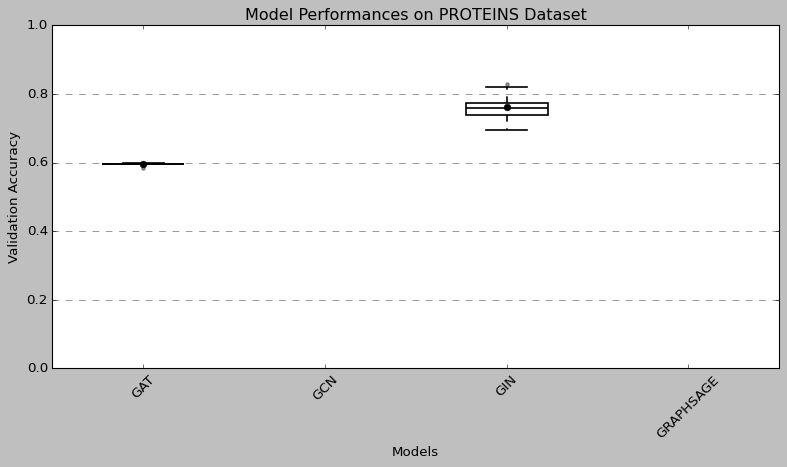

C:\Users\erikd\AppData\Local\Temp\ipykernel_2948\455709137.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


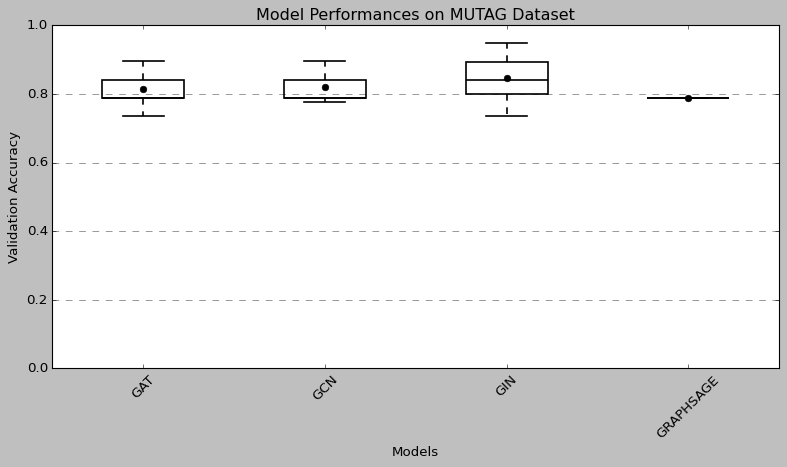

In [36]:
plot_dataset_performances(dataset_models_perf, 'ENZYMES')
plot_dataset_performances(dataset_models_perf, 'PROTEINS')
plot_dataset_performances(dataset_models_perf, 'MUTAG')


C:\Users\erikd\AppData\Local\Temp\ipykernel_2948\3905672123.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


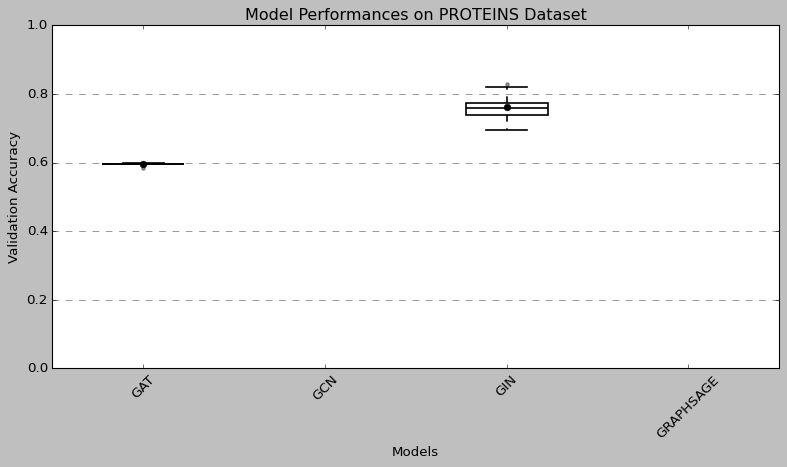

In [28]:
plot_clean_boxplot(dataset_models_perf, 'PROTEINS')

C:\Users\erikd\AppData\Local\Temp\ipykernel_2948\3905672123.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


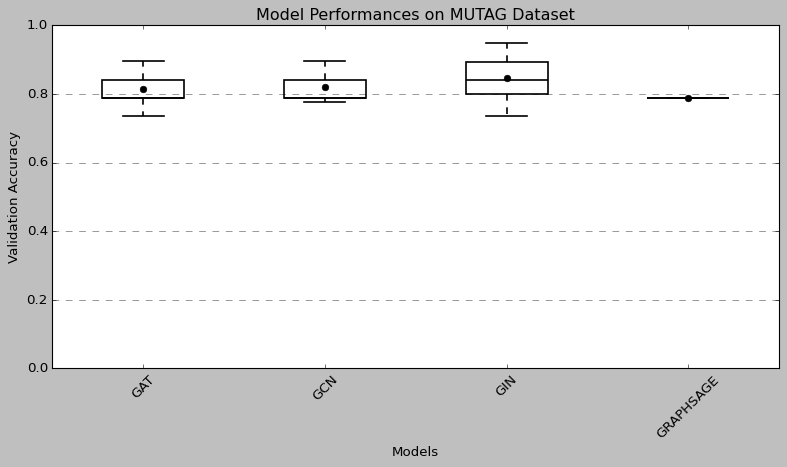

In [29]:
plot_clean_boxplot(dataset_models_perf, 'MUTAG')

In [ ]:
def plot_model_performances(models_dataset_perf, model):
    if model not in models_dataset_perf:
        print(f"Model {model} not found.")
        return

    data = models_dataset_perf[model]
    datasets = list(data.keys())
    scores = [data[dataset] for dataset in datasets] 

    plt.style.use('classic') 
    fig, ax = plt.subplots(figsize=(10, 6))

    bp = ax.boxplot(
        scores,
        labels=datasets,
        notch=False,
        patch_artist=True,  
        showmeans=True,
        boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
        whiskerprops=dict(color='black', linewidth=1.5),
        capprops=dict(color='black', linewidth=1.5),
        medianprops=dict(color='black', linewidth=1.5),
        meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'),
        flierprops=dict(marker='.', color='black', alpha=0.4)
    )

    ax.set_xlabel('Models')
    ax.set_ylabel('Validation Accuracy')
    ax.set_title(f'Model Performances of {model} on Datasets')
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig(f'boxplot_{model}.png', dpi=400, bbox_inches='tight')
    plt.show()

C:\Users\erikd\AppData\Local\Temp\ipykernel_2948\1555908713.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


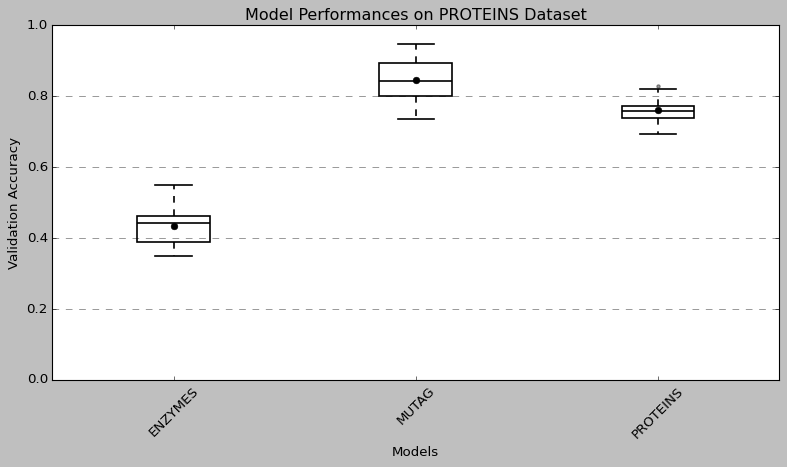

C:\Users\erikd\AppData\Local\Temp\ipykernel_2948\1555908713.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


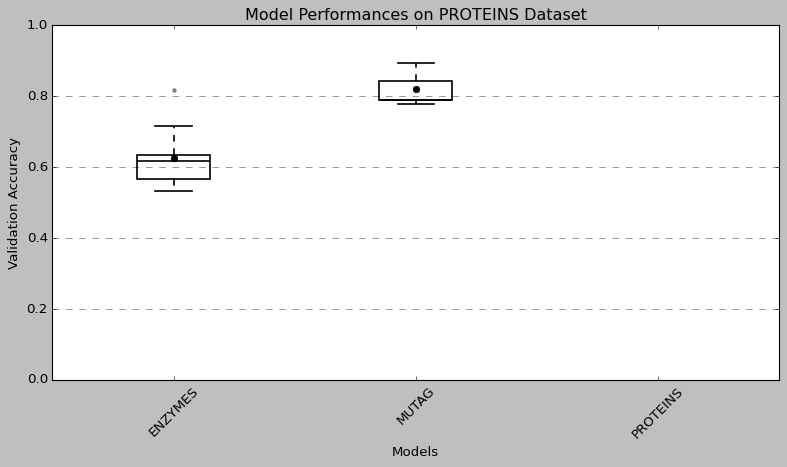

C:\Users\erikd\AppData\Local\Temp\ipykernel_2948\1555908713.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


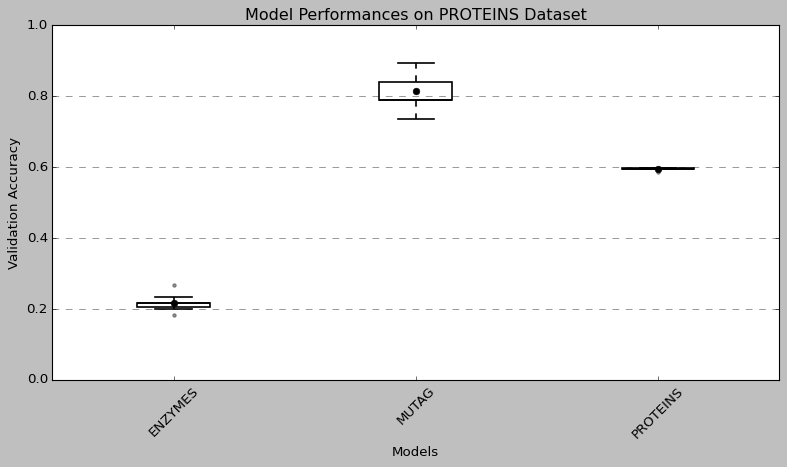

C:\Users\erikd\AppData\Local\Temp\ipykernel_2948\1555908713.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


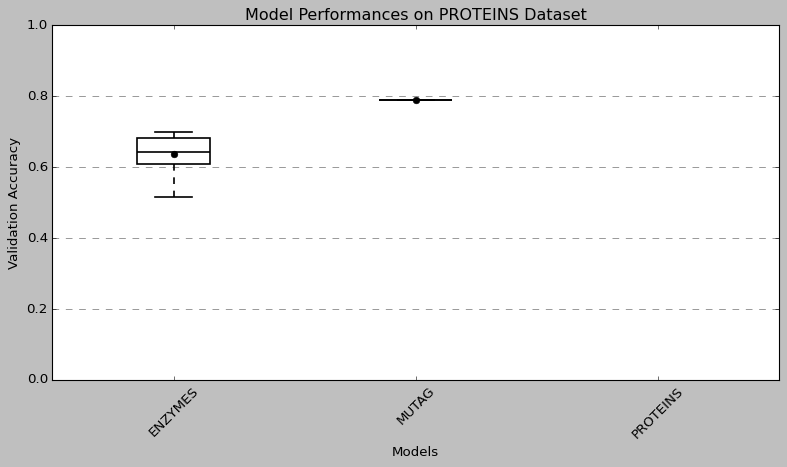

In [33]:
plot_model_performances(models_dataset_perf, 'GIN')
plot_model_performances(models_dataset_perf, 'GCN')
plot_model_performances(models_dataset_perf, 'GAT')
plot_model_performances(models_dataset_perf, 'GRAPHSAGE')
